In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
data = pd.read_csv('WineQT.csv')

In [6]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [7]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [8]:
data.shape

(1143, 13)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [10]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


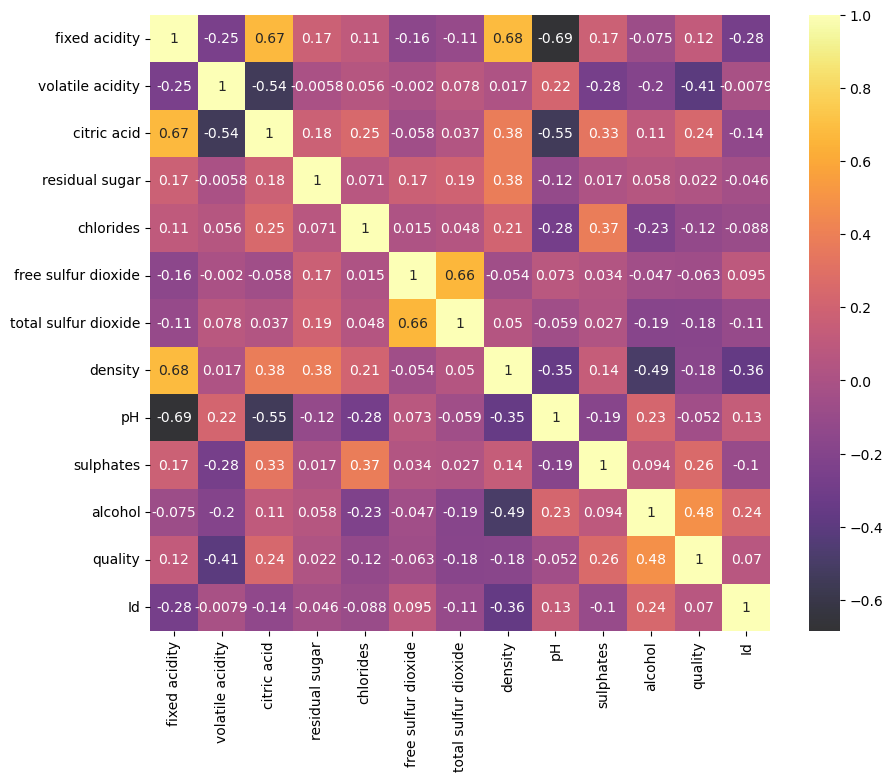

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), cmap='inferno', annot=True,alpha=0.8)
plt.show()

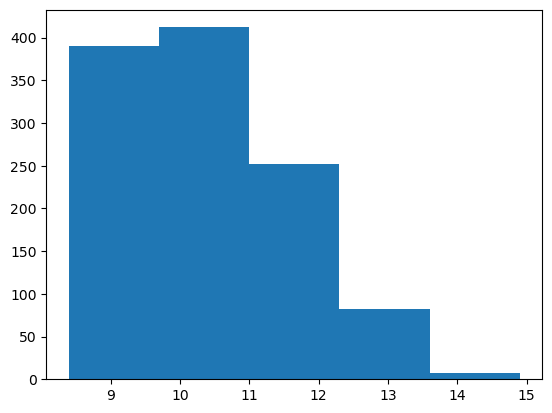

In [13]:
plt.hist(data['alcohol'], bins=5)
plt.show()

In [14]:
print(data["quality"].value_counts())

5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64


In [32]:
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
features, labels=  oversample.fit_resample(data.drop(["quality"],axis=1),data["quality"])
scaler = preprocessing.MinMaxScaler()
names = features.columns
d = scaler.fit_transform(features)
scaled_df = pd.DataFrame(d, columns=names)
scaled_df.to_csv("resampled_features.csv", index=False)
labels.to_csv("resampled_labels.csv", index=False)

In [28]:
scaled_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id
count,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000,2898.000000
mean,0.336832,0.316200,0.284750,0.112633,0.125289,0.188517,0.113008,0.478875,0.451938,0.199694,0.342147,0.530442
std,0.147198,0.170783,0.202660,0.078704,0.078238,0.136666,0.096879,0.138847,0.119374,0.100023,0.177735,0.288779
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.230088,0.180197,0.082185,0.069955,0.094109,0.074897,0.042403,0.381110,0.377347,0.136229,0.197864,0.287414
50%,0.302402,0.294212,0.288700,0.087199,0.108514,0.149254,0.083412,0.475670,0.448819,0.179641,0.318217,0.546650
75%,0.421316,0.407534,0.447813,0.118439,0.128058,0.253142,0.151279,0.563681,0.527559,0.246291,0.473414,0.787570
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(scaled_df,labels,test_size=0.33,random_state=42)

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [19]:
dt_classifier =  DecisionTreeClassifier(criterion = "entropy", random_state=42)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [20]:
y_pred = dt_classifier.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, r2_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.7586206896551724


In [22]:
print("Accuracy (without hyperparameter tuning):", accuracy)

Accuracy (without hyperparameter tuning): 0.7586206896551724


In [23]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a grid search object
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best estimator from the grid search
best_dt_classifier = grid_search.best_estimator_

# Print the best parameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)

# Make predictions on the testing data using the best estimator
y_pred_tuned = best_dt_classifier.predict(X_test)

# Calculate accuracy using the best estimator
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print("Accuracy (with hyperparameter tuning):", accuracy_tuned)

Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Accuracy (with hyperparameter tuning): 0.7492163009404389


In [24]:
from sklearn.metrics import classification_report, confusion_matrix

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_tuned))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_tuned))

Classification Report:
              precision    recall  f1-score   support

           3       0.93      0.97      0.95       156
           4       0.75      0.82      0.78       157
           5       0.64      0.57      0.60       168
           6       0.52      0.46      0.49       166
           7       0.70      0.82      0.76       159
           8       0.96      0.89      0.92       151

    accuracy                           0.75       957
   macro avg       0.75      0.75      0.75       957
weighted avg       0.75      0.75      0.75       957

Confusion Matrix:
[[152   1   2   1   0   0]
 [  4 128  14   8   3   0]
 [  5  17  96  39  10   1]
 [  2  24  31  77  30   2]
 [  0   1   6  19 130   3]
 [  0   0   1   4  12 134]]
